In [20]:
from __future__ import division 
from __future__ import print_function
import h5py as h5




import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')
import string

from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
import coencodeVarious        as CV
from PostProcessingScripts import * 
import sys

# sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')

import ClassCOMPAS     as CC
import ClassFormationChannels as FC



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [208]:
# #general path to file (which I pass to the formationChannel file later)
# # path = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
# #specific path to use now
# path1 = path+'COMPASOutput.h5'
# fdata = h5.File(path1)
# print(fdata.keys())

In [209]:
# metallicities = [0.001, 0.0142]
# metallicityLabels = ['Z=0.001', 'Z=0.0142']

# #### Fiducial 
# MODEL = 'Fiducial'



#But I want only within Hubble time 
DataBHNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataBHNS.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=True)
DataBHNS.setCOMPASData()


DataNSNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataNSNS.setCOMPASDCOmask(types='BNS',  withinHubbleTime=True, optimistic=True)
DataNSNS.setCOMPASData()

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


In [210]:
DataList = [DataNSNS, DataBHNS]

print(DataNSNS.systemicVelocity)


[ 59.4303  108.055    78.5642  ... 246.483     9.53985  78.9671 ]


In [211]:
''' Below I plot the ZAMS masses of the binaries forming BHNS or NSBH showing the formation channels '''


# weightsSystems =  fdata['systems']['weight'][...].squeeze()

    


def plotVsys_Tmerger(ax, DataList, chosenMetallicity, xylabels, indplot):
    """
    ## parameters: 
    ax: axes to plot on
    fc: formationchannels function 
    Data: Data with the target binary already specified
    dictRank: dictionary of the channels & their channel nr for all metallicities
    dictList: List with the names of the channels
    withinHubble: whether to select only DCOs that merge in a Hubble time
    """
    maxM2ZAMSOLD, maxM1ZAMSOLD = 0,0

    TypeColours = ['#fc8d62','#66c2a5']
    TypesLabels      = [ 'NSNS', 'BHNS']
    print('now at Z = %s'%chosenMetallicity)
    solar = 0.0142
    xlabel, ylabel = xylabels
    for ind_D, Data in enumerate(DataList):

        # mask systems with ChosenMetallicity:
        DATAmetallicities = Data.metallicitySystems
        maskZ = (DATAmetallicities==chosenMetallicity)

        M1ZAMS = Data.m1zams[maskZ]
        M2ZAMS = Data.m2zams[maskZ]
        tc = Data.tc[maskZ] # Myr
        #the [::2] is because each binary has 2 SN, and thus vsys is printed twice
        vsys = Data.systemicVelocity[::2][maskZ] # km/s , 
        
        vsys = np.log10(vsys)
        tc = np.log10(tc)

        weights= Data.weight[maskZ]


        if ind_D==0: # only legendlabel in one of 2 metallicity plots
            legendlabel=TypesLabels[ind_D]
        else:
            legendlabel=None


        if len(weights):
            stimes_weight=10
            ax[ind_D].scatter(vsys,tc, s=10, edgecolor ='', linewidth=0.1,\
                             c=TypeColours[ind_D],label =legendlabel, zorder=10)


            
        if ind_D==0:
            
            ax[ind_D].set_ylabel(ylabel, fontsize=fs)
#             ax[ind_D].tick_params(which='both', width=2)
            
#         ax[ind_D].yaxis.set_minor_locator(AutoMinorLocator())
        ax[ind_D].xaxis.set_minor_locator(AutoMinorLocator())
        
        ax[ind_D].tick_params(labelsize=fs)
#         ax[ind_D].grid(True, which='major');
        
        if indplot==1:
            ax[ind_D].set_xlabel(xlabel, fontsize=fs)


        ax[ind_D].grid(True)
        ax[ind_D].set_xlim(0, 3)
        ax[ind_D].set_ylim(-6, 4.15) 


        
#         ### 2nd axes###
#         ax2y = ax[ind_D].twinx()
        
#         ax2y.set_xlim(0,1)
#         ax2y.set_ylim(-1.1, 2) 
# #         ax2y.set_yscale('log')
#         ax2y.tick_params(labelsize=fs)
#         if ind_D==1:
#             ax2y.set_ylabel(ylabel2, fontsize=fs)           
                
        

#         ax2y.set_yticks([np.log10(0.5),np.log10(5),np.log10(50)])
#         ax2y.set_yticklabels( [r'$0.5$',r'$5$', r'$50$'] )#[        

#         ##################
        
        
        ax[ind_D].yaxis.set_minor_locator(AutoMinorLocator())
        


        d1 = 1 * u.kpc
        d2 = 10 * u.kpc
        tmerger = 10**(np.linspace(-6,5, 10)) * u.Myr
        vsys1 = (d1/tmerger).to(u.km / u.s)
        vsys2 = (d2/tmerger).to(u.km / u.s)
        vsysnames = [r'1 kpc', r'10 kpc']
        vsys_yvalues = [0.5,1.5]
        
        for ind_v, vsys in enumerate([vsys1, vsys2]):
            ax[ind_D].plot(np.log10(vsys.value), np.log10(tmerger.value) , color = 'k', lw = 2, linestyle = ':', zorder=10)
            ax[ind_D].text(2.6, vsys_yvalues[ind_v],  vsysnames[ind_v], rotation = -17, fontsize = fs-10, color = 'k')#, weight = 'bold')
 
        
        
        
#         xcord_line = np.linspace(-2,3,100)
#         # plot a few coordinates:
#         ycordlist = [0.5, 5, 50]
#         for ind_cord, ycord in enumerate(ycordlist):
#             ycord_line = np.log10(ycord) * np.ones_like(xcord_line)
#             ax[ind_D].plot(xcord_line, ycord_line, c='k', lw=2, linestyle =':')
#             ax[ind_D].text(0.02, np.log10(ycord), s=r' %s $\rm{AU}$'%ycord, fontsize=14, \
#                            horizontalalignment='left', verticalalignment='bottom', rotation=0)         
        
        
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        ax[ind_D].annotate(r'$Z = %s$'%chosenMetallicity, xy=(0.1, 0.095), xycoords='axes fraction', fontsize = fs, weight = 'bold', va="top",bbox=bbox_props)
        if ind_D ==0:  
            handles, labels = ax[ind_D].get_legend_handles_labels()
        
        ax[ind_D].text(2, -5.7, TypesLabels[ind_D] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left')#, weight = 'bold')
    
    
    return handles, labels



now at Z = 0.001
now at Z = 0.0142


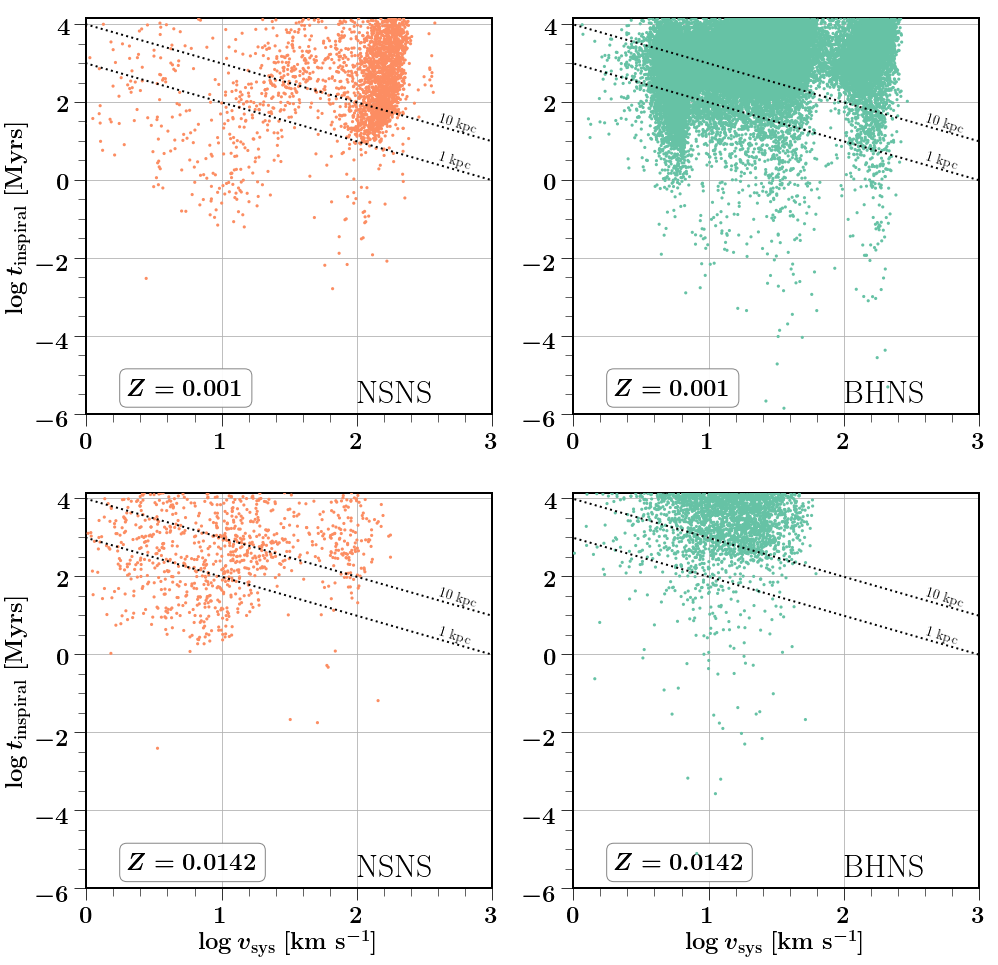

In [212]:
f, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                  gridspec_kw={"width_ratios":[1.5, 1.5]})
ylabel = r'$\log t_{\rm{inspiral}} \ [\rm{Myrs}] $'
xlabel = r'$\log v_{\rm{sys}} \ [\rm{km} \ \rm{s}^{-1}] $'
xylabels = [xlabel, ylabel]

handles, labels = plotVsys_Tmerger(ax[0], DataList=DataList, chosenMetallicity=0.001, xylabels=xylabels, indplot=0)


_,_  = plotVsys_Tmerger(ax[1], DataList=DataList, chosenMetallicity=0.0142, xylabels=xylabels, indplot=1)

plt.savefig('./VsysTinspiralBHNS-NSNS-scatter_mA.png', dpi = 300)
plt.show()

In [222]:



def calculateRisco(m_bhtemp, Xefftemp):
    # this is prograde orbit
    # see also https://duetosymmetry.com/tool/kerr-isco-calculator/

    # everything in cgs
    c = 2.99792458E10 #[cm s-1] 
    G = 6.67259E-8   
    Msun = 1.99E33 # gr
    Rsun = 6.96E10 # cm     
    
    factorFront =   ((G*m_bhtemp)/c**2) #m_bhtemp #s
    
    Z1 = 1 + (1 - Xefftemp**2)**(1/3) * ((1 + Xefftemp)**(1/3) + (1 - Xefftemp)**(1/3) )
    Z2 = np.sqrt((3* Xefftemp**2 + Z1**2))
    
    Risco = factorFront * (3 + Z2 - np.sqrt((3-Z1)*(3+Z1 +2*Z2)))
    return Risco



def calculateEjectedMassMerger(m_ns, r_ns, m_bh, Xeff ):
 # from 1807.00011, Eq 4 
    # returns M_rem in solar masses 
    # input r and m in solar masses and R sun. Xeff in [0,1] (symmetric) 
    # RNS in km
    
    
    # everything in cgs
    c = 2.99792458E10 #[cm s-1] 
    G = 6.67259E-8   
    Msun = 1.99E33 # gr
    Rsun = 6.96E10 # cm         
    
    
    # convert to cgs
    r_ns  = r_ns*0.1*10**6 #np.asarray([1.E6]* len(m_ns)) # to cm
    m_ns_cgs = Msun * m_ns
    m_bh_cgs = Msun * m_bh
    
    
    alpha, beta, gamma, delta = 0.406, 0.139, 0.255, 1.761
    C_NS = G * m_ns_cgs / (r_ns * c**2)
    
    R_isco = calculateRisco(m_bh_cgs, Xeff)
    
    R_isco_norm  = R_isco / (m_bh_cgs * (G/c**2)) 
    
    Q = m_bh_cgs / m_ns_cgs
    
    eta = Q / (1 + Q)**2
    
    FirstTerm  = alpha*(1 - 2*C_NS) / eta**(1/3)
    SecondTerm = beta* R_isco_norm * C_NS / eta 
    
    A = np.asarray(FirstTerm - SecondTerm + gamma)
    B = np.zeros_like(m_ns_cgs)
    
    Mrem_model = np.maximum(A,B)**(delta)
    
    Mrem_model /= Msun # in solar masses 
    
    # and the true M remnant mass (not normalized and in solar masses =)
    Mrem_solar = Mrem_model * m_ns_cgs  
    return Mrem_solar # in [Msun]

Rns = 13.5 # in km 
# r_ns = np.asarray([Rns]*len(m1bh))
# for ind_chi, chi_bh in enumerate(listXbh):


Mej = calculateEjectedMassMerger(m_ns=1.4, r_ns=Rns, m_bh=3, Xeff=0)
print(Mej)

# NSmasses = np.linspace(1,2.5,10000)
# Niter = 1000
# # BH_chi = 0
# Arrays_minNSmassEjecta = [] # _Rns11chi0 _Rns13chi0 Rns11chi1 Rns13chi1
# for ind_chi, chi in enumerate([0.0, 0.5]):
#     BH_chi   = chi * np.ones_like(NSmasses)
#     for ind_Rns, NSradii in enumerate([11.5,13.0]):
#         Rns = NSradii
# #         BH_chi=chi
#         minNSmassEjecta = []
#         for ind_bh, BHmass in enumerate(np.linspace(2.5, 20, Niter)):

#             BHmasses = BHmass*np.ones_like(NSmasses)
#             NS_radii = Rns * np.ones_like(NSmasses)
            
#             Mej = calculateEjectedMassMerger(m_ns=NSmasses, r_ns=NS_radii, m_bh=BHmasses, Xeff=BH_chi)

#             maskEjecta = (Mej > 0)
#             # if there are solutions with Mej >0, append the first solution (with min BH mass)
#             if len(NSmasses[maskEjecta]):
#                 minNSmassEjecta.append(NSmasses[maskEjecta][-1])
#         #         print(minNSmassEjecta[-1])
#             else:
#                 minNSmassEjecta.append(-1) # just append a non physical value that should not show up on plot
#         print('R_ns, chi =', Rns, BH_chi )
#         Arrays_minNSmassEjecta.append(minNSmassEjecta)
    
    

# Arrays_minNSmassEjecta_labels = [r'$R_{\rm{NS}}=11.5, \Chi_{\rm{BH}}=0']

0.04097548308757769


# DISTRIBUTION PLOT: 

In [236]:
''' Below I plot the ZAMS masses of the binaries forming BHNS or NSBH showing the formation channels '''


# weightsSystems =  fdata['systems']['weight'][...].squeeze()

    


def plotVsys_TmergerDistribution(ax, DataList, chosenMetallicity, xylabels, indplot):
    """
    ## parameters: 
    ax: axes to plot on
    fc: formationchannels function 
    Data: Data with the target binary already specified
    dictRank: dictionary of the channels & their channel nr for all metallicities
    dictList: List with the names of the channels
    withinHubble: whether to select only DCOs that merge in a Hubble time
    """
    maskBHNSdisrupted = False
    
    TypeColours = ['#fc8d62','#66c2a5']
    TypesLabels      = [ 'NSNS', 'BHNS']
    print('now at Z = %s'%chosenMetallicity)
    solar = 0.0142
    xlabel, ylabel = xylabels
    for ind_ax in range(3):
        
        for ind_D, Data in enumerate(DataList):

            # mask systems with ChosenMetallicity:
            DATAmetallicities = Data.metallicitySystems
            maskZ = (DATAmetallicities==chosenMetallicity)

            M1ZAMS = Data.m1zams[maskZ]
            M2ZAMS = Data.m2zams[maskZ]
            
            
            M1 = Data.mass1[maskZ]
            M2 = Data.mass2[maskZ]
            
            MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)  
            
            tc = Data.tc[maskZ] # Myr
            #the [::2] is because each binary has 2 SN, and thus vsys is printed twice
            vsys = Data.systemicVelocity[::2][maskZ] # km/s , 
            
            distance = (vsys * u.km / u.s ) * tc * u.Myr
            distance = (distance.to(u.kpc)).value
            vsys = np.log10(vsys)
            tc = np.log10(tc)
            
            weights= Data.weight[maskZ]

            if maskBHNSdisrupted==True:
                if ind_D==1:
                    Rns = 11.5 * np.ones_like(MNS)
                    Mej = calculateEjectedMassMerger(m_ns=MNS, r_ns=Rns, m_bh=MBH, Xeff=0.1)
                    
                    
                    maskDisruptedBHNS = Mej >0
                    
                    vsys = vsys[maskDisruptedBHNS]
                    distance = distance[maskDisruptedBHNS]
                    tc = tc[maskDisruptedBHNS]
                    weights = weights[maskDisruptedBHNS]
                    

            
            
            
            legendlabel=None


            if ind_D==0:
                htype = 'step'
                zorder=200
                alpha=0.8
                lw = 5
            else:
                htype = 'stepfilled'
                zorder=10
                alpha = 0.5  
                lw = 2
                
            if (ind_ax==1) and (indplot==0):
                labels = TypesLabels[ind_D]
            else:
                labels = None
                
            if ind_ax==0:
                xlabel = r'$\log v_{\rm{sys}} \ [\rm{km} \ \rm{s}^{-1}] $'
                
                bins = np.linspace(0,3,50)
                
                ax[ind_ax].hist(vsys, bins=bins, color=TypeColours[ind_D], histtype=htype,  linewidth=lw,\
                                 label =labels,  density=True, alpha=alpha, zorder=zorder, weights=weights)
                ax[ind_ax].set_xlim(0, 3)
                
                
            elif ind_ax==1:
                xlabel = r'$\log t_{\rm{inspiral}} \ [\rm{Myrs}] $'
                bins = np.linspace(-3,4.2,50)
                ax[ind_ax].set_xlim(-3,4.2)
                ax[ind_ax].hist(tc, bins=bins, color=TypeColours[ind_D], histtype=htype,  linewidth=lw,\
                                 label =labels, density=True, alpha=alpha, zorder=zorder, weights=weights)                
            elif ind_ax==2:
                xlabel = r'$\log d_{\rm{traveled}} \ [\rm{kpc}] $'
                bins = np.linspace(-5,5,50)
                ax[ind_ax].set_xlim(-5, 4)
                ax[ind_ax].hist(np.log10(distance), bins=bins, color=TypeColours[ind_D], histtype=htype, linewidth=lw,\
                                 label =labels,  density=True, alpha=alpha, zorder=zorder, weights=weights)


            
        if ind_D==0:
            
            ax[ind_ax].set_ylabel(ylabel, fontsize=fs)
#             ax[ind_D].tick_params(which='both', width=2)
            
#         ax[ind_D].yaxis.set_minor_locator(AutoMinorLocator())
        ax[ind_ax].xaxis.set_minor_locator(AutoMinorLocator())

        ax[ind_ax].tick_params(labelsize=fs)
#         ax[ind_D].grid(True, which='major');

        if indplot==1:
            ax[ind_ax].set_xlabel(xlabel, fontsize=fs)


        ax[ind_ax].grid(True)


        if ind_ax ==1:
            
            ax[ind_ax].legend(fontsize=fs, loc="upper left")

        ax[ind_ax].yaxis.set_minor_locator(AutoMinorLocator())
        

        if ind_ax ==0:
            ax[ind_ax].set_ylabel(ylabel, fontsize=fs)

        
        
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        if ind_ax ==2:
            ax[ind_ax].annotate(r'$Z = %s$'%chosenMetallicity, xy=(0.1, 0.85), xycoords='axes fraction', fontsize = fs, weight = 'bold', va="top",bbox=bbox_props)
#         if ind_ax ==0:  
#             handles, labels = ax[ind_ax].get_legend_handles_labels()
        
#         ax[ind_D].text(2, -5.7, TypesLabels[ind_D] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left')#, weight = 'bold')
    
    
    return #handles, labels



now at Z = 0.001
now at Z = 0.0142


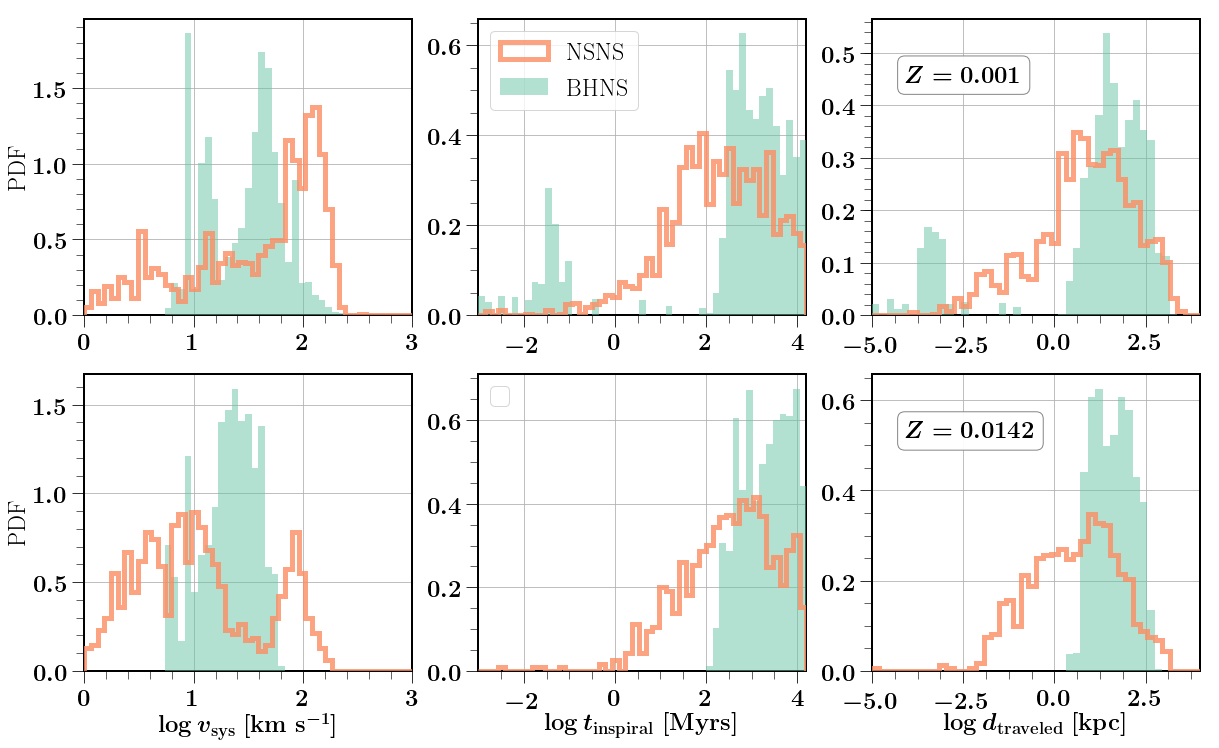

In [234]:
f, ax= plt.subplots(ncols=3,nrows=2, figsize=(20,12), 
                  gridspec_kw={"width_ratios":[1.5, 1.5,1.5]})
ylabel = 'PDF'
xlabel = r'$\log v_{\rm{sys}} \ [\rm{km} \ \rm{s}^{-1}] $'
xylabels = [xlabel, ylabel]

plotVsys_TmergerDistribution(ax[0], DataList=DataList, chosenMetallicity=0.001, xylabels=xylabels, indplot=0)



xylabels = [xlabel, ylabel]
plotVsys_TmergerDistribution(ax[1], DataList=DataList, chosenMetallicity=0.0142, xylabels=xylabels, indplot=1)




plt.savefig('./VsysTinspiralBHNS-NSNS-histograms_mA.png', dpi = 300)
plt.show()

In [ ]:
# DIFFERENT MODEL 

In [194]:
# #general path to file (which I pass to the formationChannel file later)
# # path = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/alpha0_1/'
# #specific path to use now
# path1 = path+'COMPASOutput.h5'
# fdata = h5.File(path1)
# print(fdata.keys())


# metallicities = [0.001, 0.0142]
# metallicityLabels = ['Z=0.001', 'Z=0.0142']

# #### Fiducial 
# MODEL = 'Fiducial'



#But I want only within Hubble time 
DataBHNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataBHNS.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
DataBHNS.setCOMPASData()


DataNSNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataNSNS.setCOMPASDCOmask(types='BNS',  withinHubbleTime=True, optimistic=False)
DataNSNS.setCOMPASData()

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


now at Z = 0.001
now at Z = 0.0142


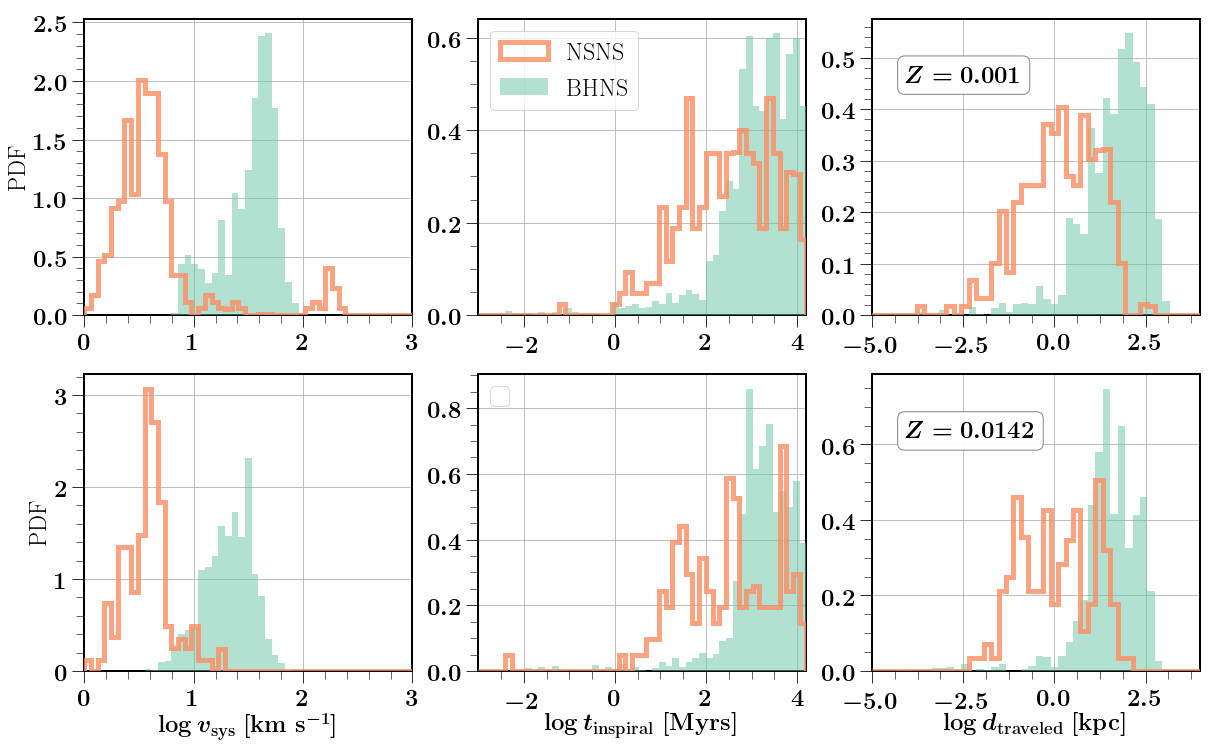

In [195]:
DataList = [DataNSNS, DataBHNS]


f, ax= plt.subplots(ncols=3,nrows=2, figsize=(20,12), 
                  gridspec_kw={"width_ratios":[1.5, 1.5,1.5]})
ylabel = 'PDF'
xlabel = r'$\log v_{\rm{sys}} \ [\rm{km} \ \rm{s}^{-1}] $'
xylabels = [xlabel, ylabel]

plotVsys_TmergerDistribution(ax[0], DataList=DataList, chosenMetallicity=0.001, xylabels=xylabels, indplot=0)



xylabels = [xlabel, ylabel]
plotVsys_TmergerDistribution(ax[1], DataList=DataList, chosenMetallicity=0.0142, xylabels=xylabels, indplot=1)




plt.savefig('./VsysTinspiralBHNS-NSNS-histograms_mC.png', dpi = 300)
plt.show()

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
now at Z = 0.001
now at Z = 0.0142


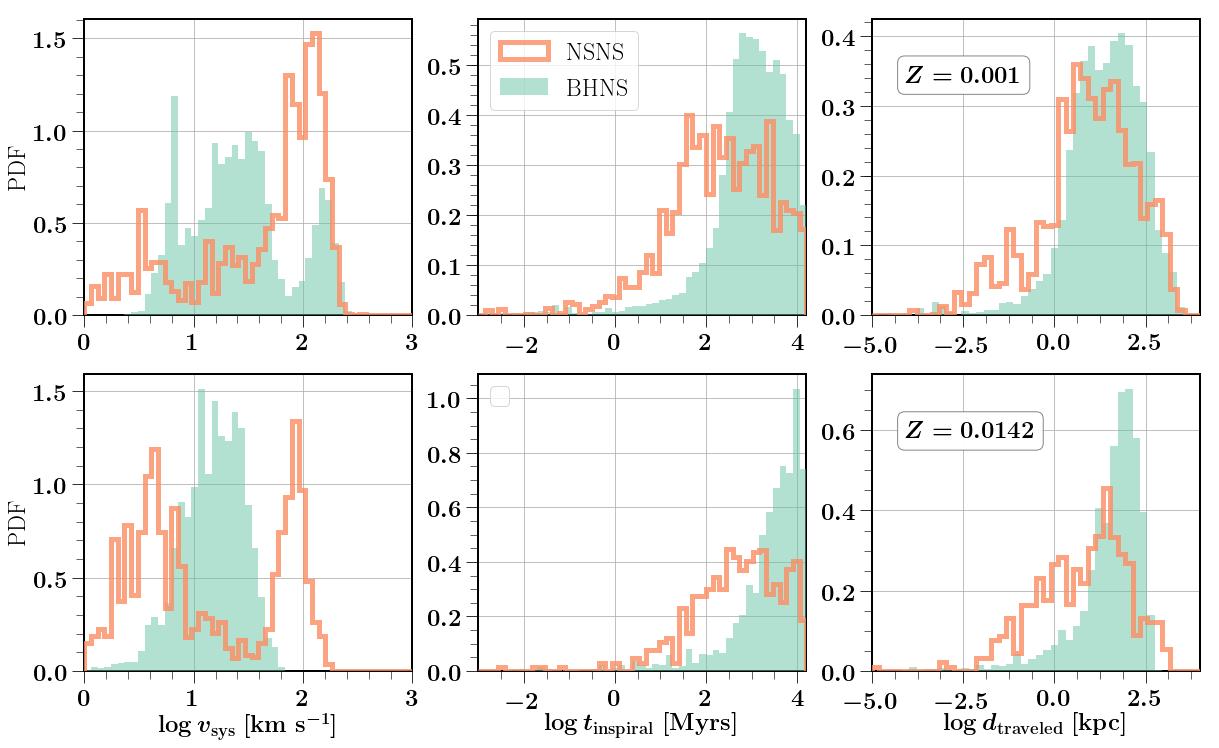

In [196]:
# #general path to file (which I pass to the formationChannel file later)
# # path = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
# #specific path to use now
# path1 = path+'COMPASOutput.h5'
# fdata = h5.File(path1)
# print(fdata.keys())


# metallicities = [0.001, 0.0142]
# metallicityLabels = ['Z=0.001', 'Z=0.0142']

# #### Fiducial 
# MODEL = 'Fiducial'



#But I want only within Hubble time 
DataBHNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataBHNS.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
DataBHNS.setCOMPASData()


DataNSNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataNSNS.setCOMPASDCOmask(types='BNS',  withinHubbleTime=True, optimistic=False)
DataNSNS.setCOMPASData()


DataList = [DataNSNS, DataBHNS]


f, ax= plt.subplots(ncols=3,nrows=2, figsize=(20,12), 
                  gridspec_kw={"width_ratios":[1.5, 1.5,1.5]})
ylabel = 'PDF'
xlabel = r'$\log v_{\rm{sys}} \ [\rm{km} \ \rm{s}^{-1}] $'
xylabels = [xlabel, ylabel]

plotVsys_TmergerDistribution(ax[0], DataList=DataList, chosenMetallicity=0.001, xylabels=xylabels, indplot=0)



xylabels = [xlabel, ylabel]
plotVsys_TmergerDistribution(ax[1], DataList=DataList, chosenMetallicity=0.0142, xylabels=xylabels, indplot=1)




plt.savefig('./VsysTinspiralBHNS-NSNS-histograms_mA.png', dpi = 300)
plt.show()

In [ ]:
# MODEL D 

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
now at Z = 0.001
now at Z = 0.0142


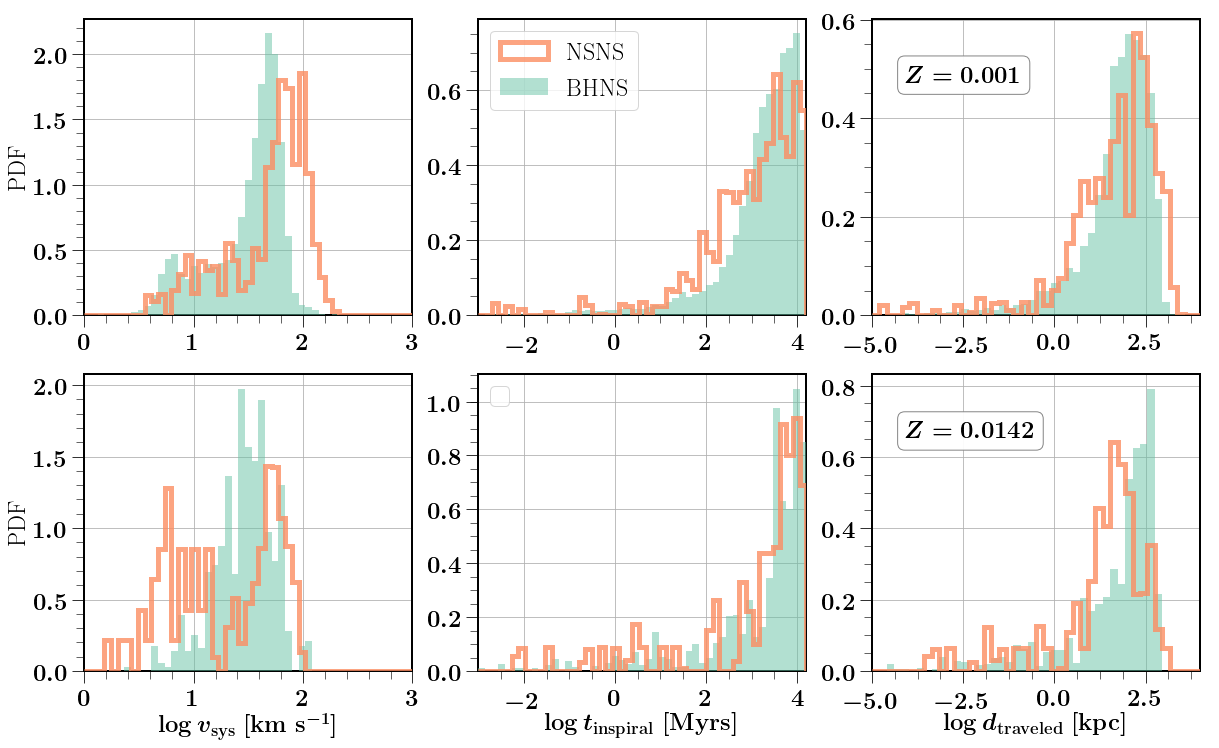

In [197]:
# #general path to file (which I pass to the formationChannel file later)
# # path = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/alpha_10/'
# #specific path to use now
# path1 = path+'COMPASOutput.h5'
# fdata = h5.File(path1)
# print(fdata.keys())


# metallicities = [0.001, 0.0142]
# metallicityLabels = ['Z=0.001', 'Z=0.0142']

# #### Fiducial 
# MODEL = 'Fiducial'



#But I want only within Hubble time 
DataBHNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataBHNS.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
DataBHNS.setCOMPASData()


DataNSNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataNSNS.setCOMPASDCOmask(types='BNS',  withinHubbleTime=True, optimistic=False)
DataNSNS.setCOMPASData()


DataList = [DataNSNS, DataBHNS]


f, ax= plt.subplots(ncols=3,nrows=2, figsize=(20,12), 
                  gridspec_kw={"width_ratios":[1.5, 1.5,1.5]})
ylabel = 'PDF'
xlabel = r'$\log v_{\rm{sys}} \ [\rm{km} \ \rm{s}^{-1}] $'
xylabels = [xlabel, ylabel]

plotVsys_TmergerDistribution(ax[0], DataList=DataList, chosenMetallicity=0.001, xylabels=xylabels, indplot=0)



xylabels = [xlabel, ylabel]
plotVsys_TmergerDistribution(ax[1], DataList=DataList, chosenMetallicity=0.0142, xylabels=xylabels, indplot=1)




plt.savefig('./VsysTinspiralBHNS-NSNS-histograms_mD.png', dpi = 300)
plt.show()

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
now at Z = 0.001
now at Z = 0.0142


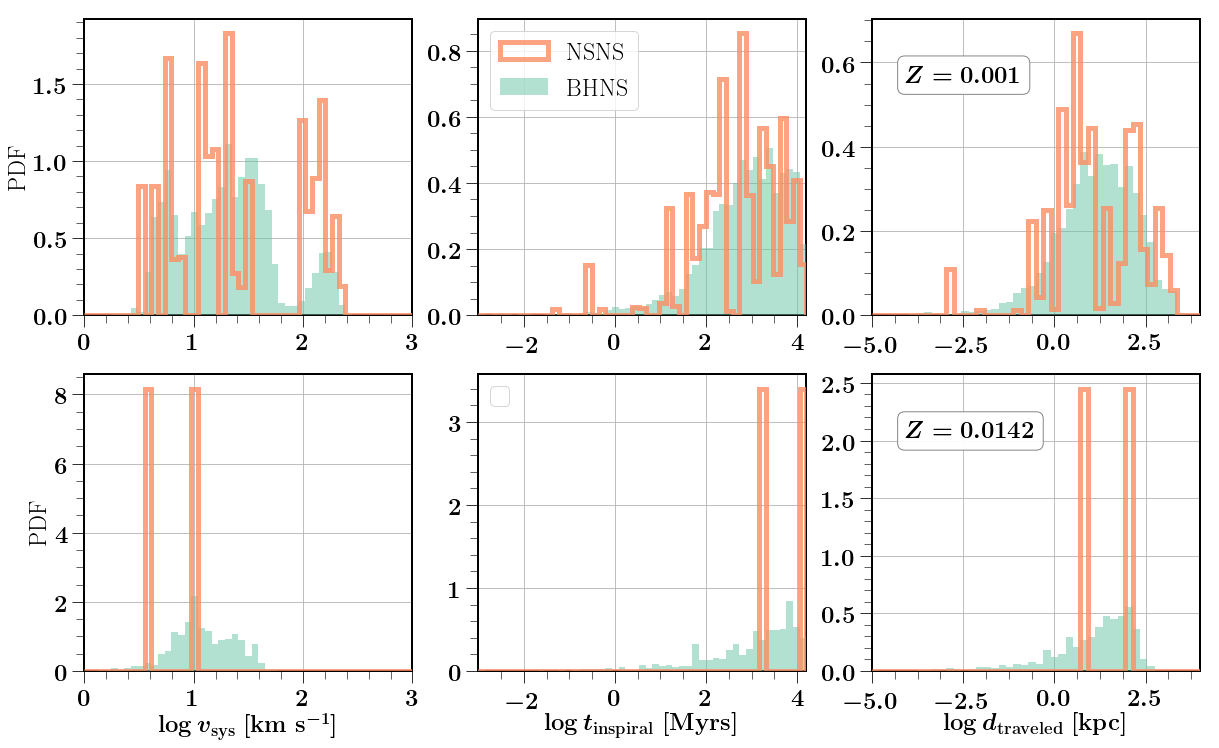

In [204]:
# #general path to file (which I pass to the formationChannel file later)
# # path = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
pathCOMPASOutput = '/Volumes/Andromeda/DATA/BHNS/unstableCaseBB/'
# '/Volumes/Virgo/DATA/BHNS/alpha_10/'
# #specific path to use now
# path1 = path+'COMPASOutput.h5'
# fdata = h5.File(path1)
# print(fdata.keys())


# metallicities = [0.001, 0.0142]
# metallicityLabels = ['Z=0.001', 'Z=0.0142']

# #### Fiducial 
# MODEL = 'Fiducial'



#But I want only within Hubble time 
DataBHNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataBHNS.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
DataBHNS.setCOMPASData()


DataNSNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataNSNS.setCOMPASDCOmask(types='BNS',  withinHubbleTime=True, optimistic=False)
DataNSNS.setCOMPASData()


DataList = [DataNSNS, DataBHNS]


f, ax= plt.subplots(ncols=3,nrows=2, figsize=(20,12), 
                  gridspec_kw={"width_ratios":[1.5, 1.5,1.5]})
ylabel = 'PDF'
xlabel = r'$\log v_{\rm{sys}} \ [\rm{km} \ \rm{s}^{-1}] $'
xylabels = [xlabel, ylabel]

plotVsys_TmergerDistribution(ax[0], DataList=DataList, chosenMetallicity=0.001, xylabels=xylabels, indplot=0)



xylabels = [xlabel, ylabel]
plotVsys_TmergerDistribution(ax[1], DataList=DataList, chosenMetallicity=0.0142, xylabels=xylabels, indplot=1)




plt.savefig('./VsysTinspiralBHNS-NSNS-histograms_mE.png', dpi = 300)
plt.show()

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
now at Z = 0.001
now at Z = 0.0142


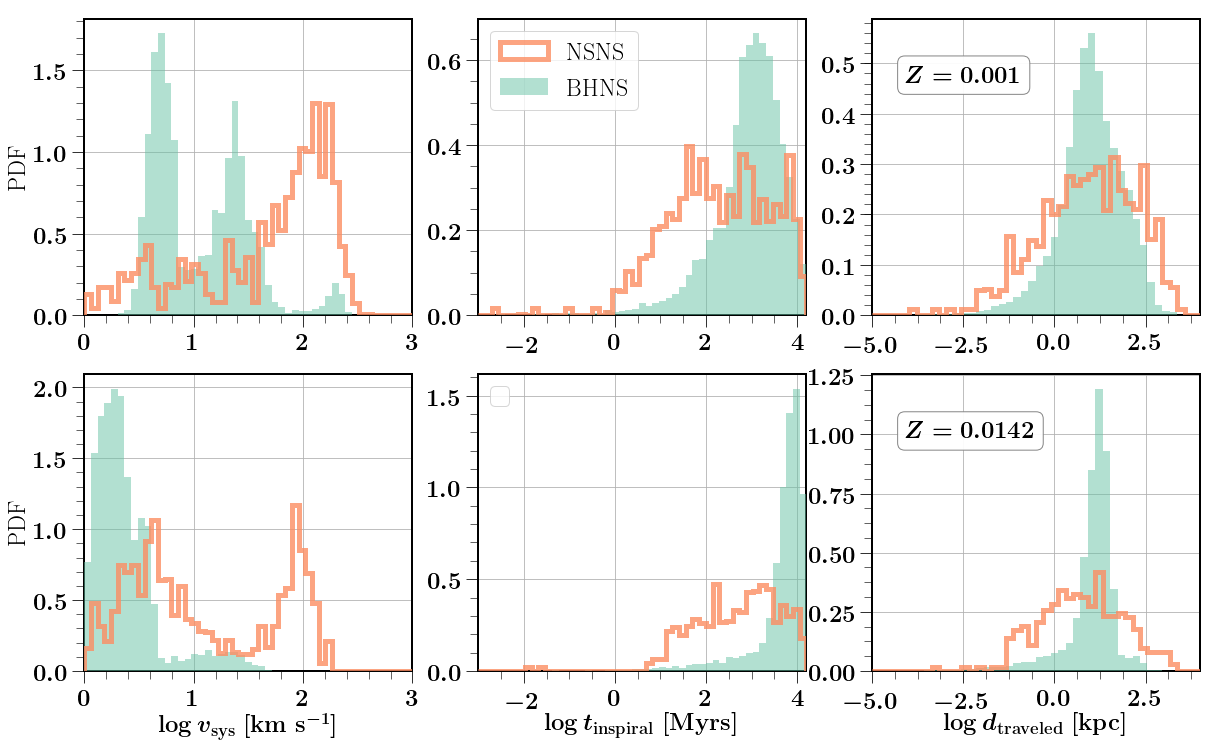

In [239]:
# #general path to file (which I pass to the formationChannel file later)
# # path = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
pathCOMPASOutput = '/Volumes/Andromeda/DATA/BHNS/rapid/'
# #specific path to use now
# path1 = path+'COMPASOutput.h5'
# fdata = h5.File(path1)
# print(fdata.keys())


# metallicities = [0.001, 0.0142]
# metallicityLabels = ['Z=0.001', 'Z=0.0142']

# #### Fiducial 
# MODEL = 'Fiducial'



#But I want only within Hubble time 
DataBHNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataBHNS.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
DataBHNS.setCOMPASData()


DataNSNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
DataNSNS.setCOMPASDCOmask(types='BNS',  withinHubbleTime=True, optimistic=False)
DataNSNS.setCOMPASData()


DataList = [DataNSNS, DataBHNS]


f, ax= plt.subplots(ncols=3,nrows=2, figsize=(20,12), 
                  gridspec_kw={"width_ratios":[1.5, 1.5,1.5]})
ylabel = 'PDF'
xlabel = r'$\log v_{\rm{sys}} \ [\rm{km} \ \rm{s}^{-1}] $'
xylabels = [xlabel, ylabel]

plotVsys_TmergerDistribution(ax[0], DataList=DataList, chosenMetallicity=0.001, xylabels=xylabels, indplot=0)



xylabels = [xlabel, ylabel]
plotVsys_TmergerDistribution(ax[1], DataList=DataList, chosenMetallicity=0.0142, xylabels=xylabels, indplot=1)




plt.savefig('./VsysTinspiralBHNS-NSNS-histograms_mF.png', dpi = 300)
plt.show()

now at Z = 0.001
now at Z = 0.0142


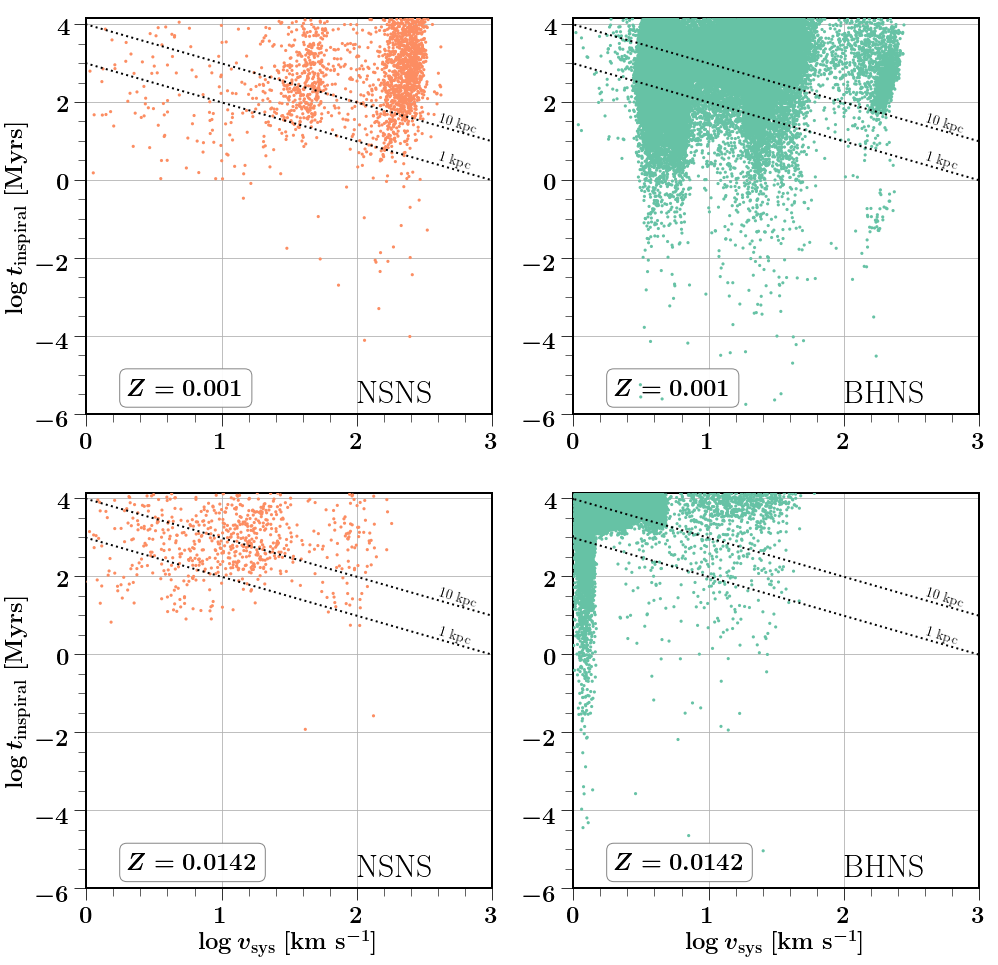

In [206]:
f, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                  gridspec_kw={"width_ratios":[1.5, 1.5]})
ylabel = r'$\log t_{\rm{inspiral}} \ [\rm{Myrs}] $'
xlabel = r'$\log v_{\rm{sys}} \ [\rm{km} \ \rm{s}^{-1}] $'
xylabels = [xlabel, ylabel]

handles, labels = plotVsys_Tmerger(ax[0], DataList=DataList, chosenMetallicity=0.001, xylabels=xylabels, indplot=0)


_,_  = plotVsys_Tmerger(ax[1], DataList=DataList, chosenMetallicity=0.0142, xylabels=xylabels, indplot=1)

plt.savefig('./VsysTinspiralBHNS-NSNS-scatter_mF.png', dpi = 300)
plt.show()

In [ ]:

# f, ax= plt.subplots(ncols=2,figsize=(16,8), 
#                   gridspec_kw={"width_ratios":[1.5, 1.5]})







f, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                  gridspec_kw={"width_ratios":[1.5, 1.5]})




#### PLOT SEPARATION AND MASS RATIO ####

xlabel = r'\textbf{initial mass} $\log_{10}(m_{1,{\rm{i}}}) \, [\rm{M}_{\odot}]$'
ylabel = r'\textbf{initial mass} $\log_{10}(m_{2,{\rm{i}}}) \, [\rm{M}_{\odot}]$'


handles, labels = plotInitialMasses(ax=ax[0], fc=fc, Data=Data\
                  , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList,channelLabelList=range(8), withinHubble=True)

lgd2 = f.legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
         bbox_to_anchor=(.9, 1.09),  markerscale=3., scatterpoints=1) # loc = 'upper center')






markersize_lgd = 200
lgd2.legendHandles[0]._sizes = [markersize_lgd]
lgd2.legendHandles[1]._sizes = [markersize_lgd]
lgd2.legendHandles[2]._sizes = [markersize_lgd]
lgd2.legendHandles[3]._sizes = [markersize_lgd]
lgd2.legendHandles[4]._sizes = [markersize_lgd]



xlabel = r'\textbf{initial mass ratio} $q_{\rm{i}} $'
ylabel2 = r'\textbf{initial separation} $a_{\rm{i}} \, [\rm{AU}]$'
ylabel = r'\textbf{initial separation} $\log_{10}(a_{\rm{i}}) \, [\rm{AU}]$'





# f.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

handles, labels = plotInitialqVSseparation(ax=ax[1], fc=fc, Data=Data\
                  , dictRank=dictChannelsBHNS, dictList=dictChannelsBHNSList, withinHubble=True)






f.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5) 
# f.savefig('./BHNS_InitialParam.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()
plt.close()        

